In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


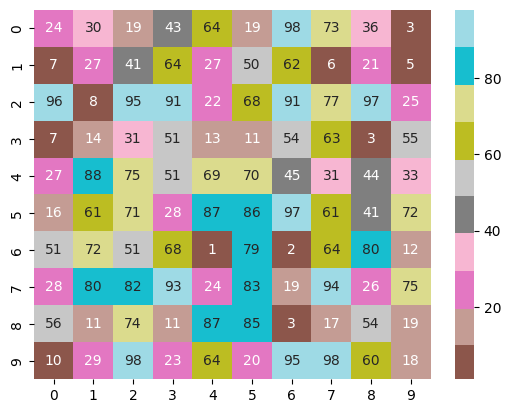

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.randint(1,100, size = (10,10))
hm = sns.heatmap(data = data,cmap="tab20", center = 0,annot=True,cbar = True)
# displaying the plotted heatmap
plt.show()

# Find out correlation between the features of Churn_Modeling dataset

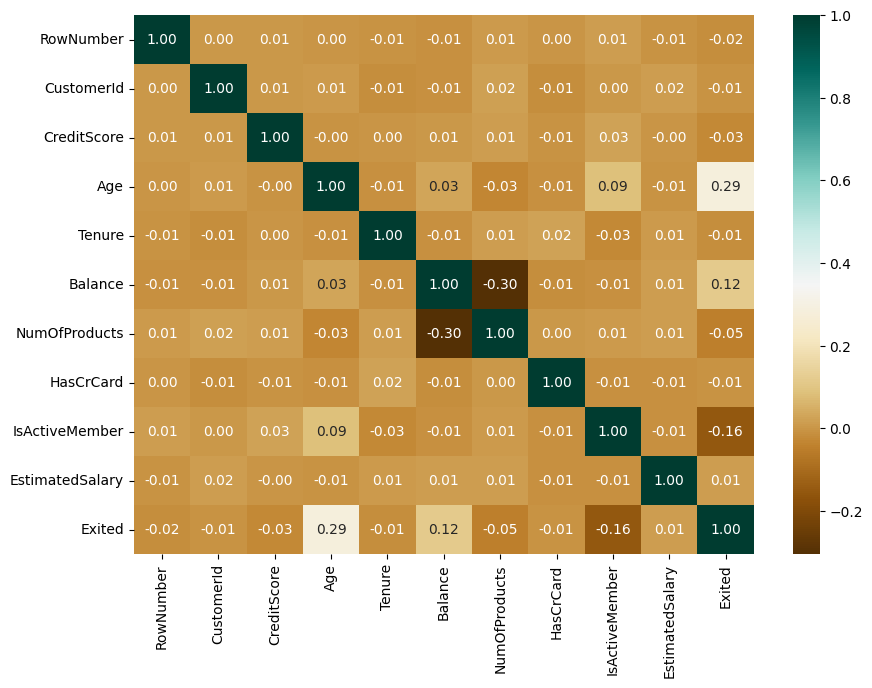

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
dataset.head()
dataset.columns
# Selecting only numerical columns
numerical_cols = ['RowNumber', 'CustomerId', 'CreditScore',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']
numerical_data = dataset[numerical_cols]
numerical_data
plt.figure(figsize = (10,7))
sns.heatmap(numerical_data.corr(),annot = True, fmt='.2f',cmap='BrBG')
plt.show()

# The Distribution of CreditScore, Age, Balance, ExtimatedSalary using displot

<ipython-input-42-9353c36537f4>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, index)


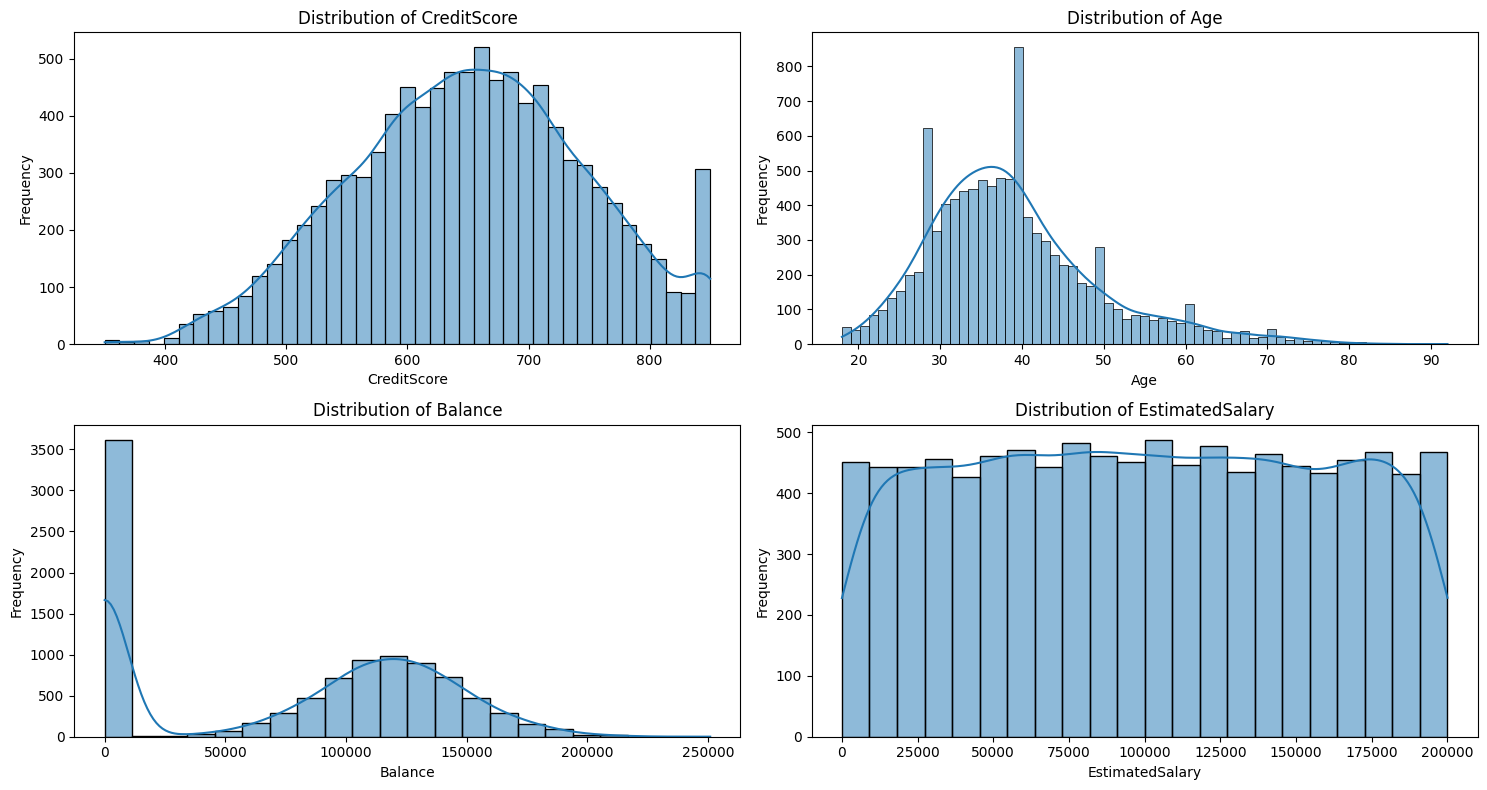

In [42]:
columns_to_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.subplots(figsize=(15, 8))
index =1
for column in columns_to_plot:
    plt.subplot(2, 2, index)
    sns.histplot(dataset[column], kde=True) #kernel density estimate (KDE)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    index +=1

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Categorical count of each category in Geography and Gender.

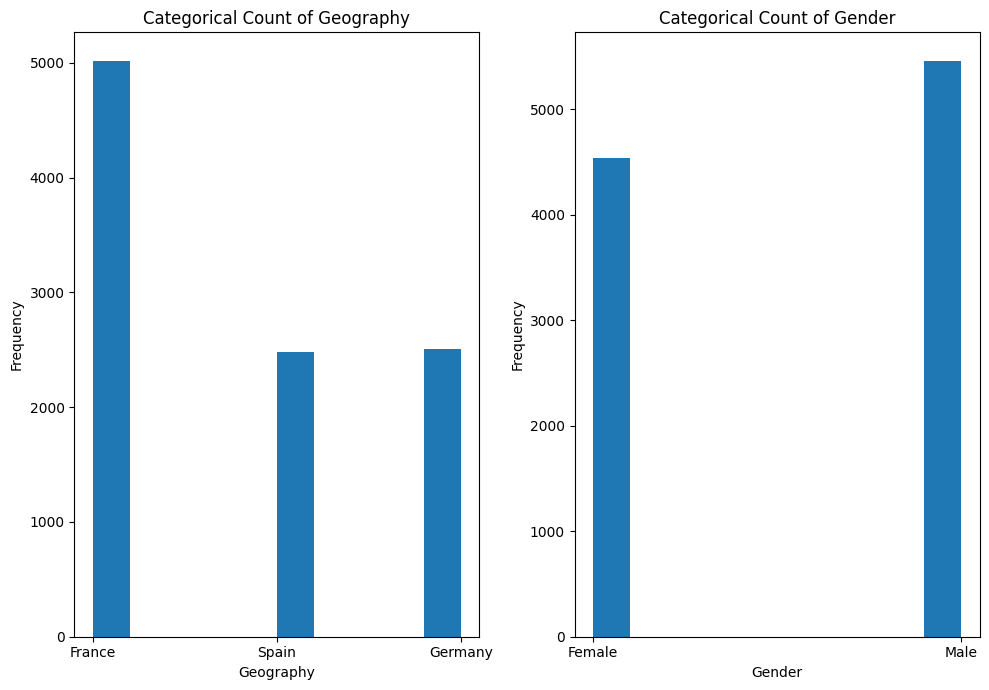

In [49]:
import matplotlib.pyplot as plt
columns_to_plot =  ['Geography','Gender']
index = 1
plt.figure(figsize = (10,7))
for col in columns_to_plot:
  plt.subplot(1,2,index)
  plt.hist(dataset[col])
  plt.title(f'Categorical Count of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  # plt.xticks(rotation=90)
  index +=1
# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Finding Missing Values and Handling them

In [56]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.isna().any()
dataset['Gender'][0] = np.nan
dataset.isna().any()

<ipython-input-56-c05e4a4d4a6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Gender'][0] = np.nan


RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender              True
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [57]:

# if there is any missing values

dataset['Gender'].fillna(dataset['Gender'].mode(),inplace = True)
dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [68]:
# Splitting Dependent and Independent Variables
dataset.head()
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:,-1:]
X
# Label Encoding
label_encoder = LabelEncoder()
dataset['Geography'] = label_encoder.fit_transform(dataset['Geography'])
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
X

# Standardize the data
sc= StandardScaler()
X = sc.fit_transform(X)
X

# train test split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

# Model Training and Evaluation

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7,max_depth= 5)
svm = SVC()
lr = LogisticRegression()
models= [knn,rfc,svm,lr]
for clf in models:
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  score = accuracy_score(y_test,y_pred)
  print("Accuracy score of ",clf.__class__.__name__,"=", 100*score)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score of  KNeighborsClassifier = 83.65
Accuracy score of  RandomForestClassifier = 85.75


<ipython-input-71-3aa016a8e8ca>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of  SVC = 85.75
Accuracy score of  LogisticRegression = 81.5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
